# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1717721890442.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,06/05/2024,5354.03,5314.48,5354.16,5297.64
1,06/04/2024,5291.34,5278.24,5298.80,5257.63
2,06/03/2024,5283.40,5297.15,5302.11,5234.32
3,05/31/2024,5277.51,5243.21,5280.33,5191.68
4,05/30/2024,5235.48,5259.77,5260.21,5222.10
...,...,...,...,...,...
2525,06/12/2014,1930.11,1943.35,1943.35,1925.78
2526,06/11/2014,1943.89,1949.37,1949.37,1940.08
2527,06/10/2014,1950.79,1950.34,1950.86,1944.64
2528,06/09/2014,1951.27,1948.97,1955.55,1947.16


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2530.000000,2530.000000,2530.000000,2530.000000
mean,3137.988775,3126.908802,3143.623202,3108.942126
std,960.800794,983.291297,989.042822,977.474059
min,1829.080000,0.000000,0.000000,0.000000
25%,2187.877500,2186.535000,2193.517500,2186.167500
50%,2876.725000,2872.735000,2889.580000,2857.400000
75%,4026.975000,4035.855000,4062.635000,3995.185000
max,5354.030000,5340.260000,5354.160000,5302.400000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,3143.604247,3143.058907,3159.859634,3124.999436
std,960.080341,959.727345,965.367695,954.040504
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2204.720000,2206.270000,2212.780000,2199.970000
50%,2879.420000,2880.720000,2892.170000,2862.600000
75%,4045.640000,4041.250000,4075.140000,4013.290000
max,5354.030000,5340.260000,5354.160000,5302.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2529
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.0+ KB


In [5]:
df.shape

(2517, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

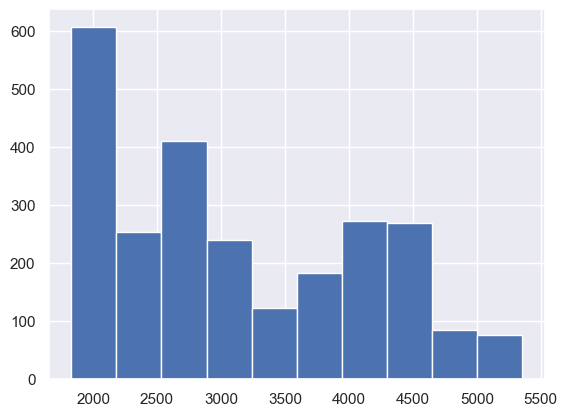

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5354.03

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3143.6042471195924

In [10]:
close_sd = df['Close/Last'].std()
close_sd

960.08034063044

In [11]:
sigma1 = close_mean + close_sd
sigma1

4103.684587750033

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5063.764928380472

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5543.805098695692

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2529
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-06-06 to 2024-06-05')

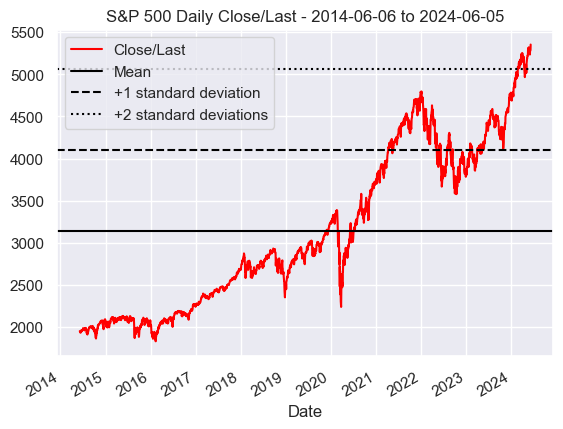

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-06-06 to 2024-06-05')

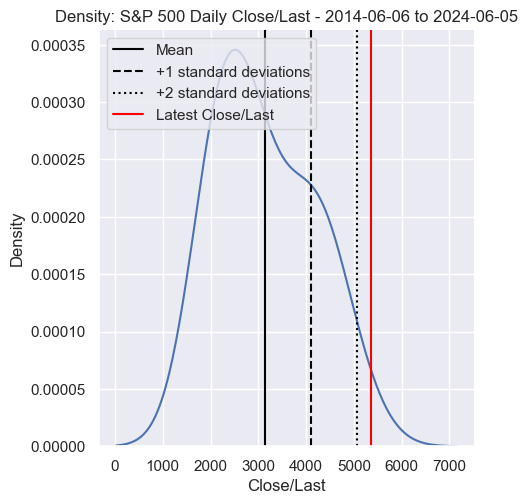

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.3023341478161337

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results